In [28]:
import pandas as pd
import matplotlib.pyplot as plt


In [74]:
def box_plot (df, column_name):
    plt.figure(figsize=(8, 6))  # Setting the figure size
    df[f'{column_name}'].plot(kind='box', vert=False)
    plt.title(f'Box Plot of {column_name}')
    plt.ylabel('Wind Speed (km/h)')
    plt.grid(True)  # Optional: adds a grid for easier reading
    plt.show()

In [75]:
def density_plot(column_name):
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    df[f'{column_name}'].plot(kind='density')
    plt.title(f'Density Plot - {column_name}')
    plt.xlim(-100, 100) 
    plt.tight_layout()
    plt.show()

In [4]:
df = pd.read_csv(r"E:\Github\AirportTrendAnalysis\data\airport_dataset_with_llm_weather.csv")

In [7]:
df = df[["airport_name", "city", "country", "iso_country", "iata", "altitude", "latitude", "longitude", "original_city", "avg_temperature", "avg_wind_speed", "avg_humidity",	"avg_visibility"]]

In [8]:
df

,airport_name,city,country,iso_country,iata,altitude,latitude,longitude,original_city,avg_temperature,avg_wind_speed,avg_humidity,avg_visibility
0,goroka,goroka,Papua New Guinea,pg,gka,1609.9536,-6.081690,145.391998,Goroka,20.0,5.0,80.0,10.0
1,madang,madang,Papua New Guinea,pg,mag,6.0960,-5.207080,145.789002,Madang,28.0,10.0,80.0,19.0
2,mounthagenkagamuga,mounthagen,Papua New Guinea,pg,hgu,1642.2624,-5.826790,144.296005,Mount Hagen,21.0,16.0,84.0,10.0
3,nadzab,nadzab,Papua New Guinea,pg,lae,72.8472,-6.569803,146.725977,Nadzab,28.0,6.0,83.0,12.0
4,portmoresbyjacksons,portmoresby,Papua New Guinea,pg,pom,44.5008,-9.443380,147.220001,Port Moresby,27.0,9.0,76.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,rogachyovoairbase,belaya,Russia,ru,\n,82.9056,71.616699,52.478298,Belaya,-3,14.0,78.0,11.0
7694,ulan-udeeast,ulanude,Russia,ru,\n,509.0160,51.849998,107.737999,Ulan Ude,-1,6.0,61.0,10.0
7695,krechevitsyairbase,novgorod,Russia,ru,\n,25.9080,58.625000,31.385000,Novgorod,6,7.0,80.0,14.0
7696,desiertodeatacama,copiapo,Chile,cl,cpo,204.2160,-27.261200,-70.779198,Copiapo,20,10.0,70.0,25.0


In [13]:
# convert empty values to numeric
df["avg_temperature"] = pd.to_numeric(df["avg_temperature"], errors='coerce')
df["avg_wind_speed"] = pd.to_numeric(df["avg_wind_speed"], errors='coerce')
df["avg_humidity"] = pd.to_numeric(df["avg_humidity"], errors='coerce')
df["avg_visibility"] = pd.to_numeric(df["avg_visibility"], errors='coerce')

C:\Users\yisi9\AppData\Local\Temp\ipykernel_15096\1847546984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["avg_temperature"] = pd.to_numeric(df["avg_temperature"], errors='coerce')
C:\Users\yisi9\AppData\Local\Temp\ipykernel_15096\1847546984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["avg_wind_speed"] = pd.to_numeric(df["avg_wind_speed"], errors='coerce')
C:\Users\yisi9\AppData\Local\Temp\ipykernel_15096\1847546984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

## check for max and min values of temp, wind, humidity and visibility

In [14]:
df["avg_temperature"].max()

36.0

In [16]:
df["avg_temperature"].min()
# looks to be wrong

-214.0

In [17]:
df["avg_wind_speed"].max()

30.0

In [18]:
df["avg_wind_speed"].min()

2.0

In [19]:
df["avg_humidity"].max()

95.0

In [20]:
df["avg_humidity"].min()

18.0

In [21]:
df["avg_visibility"].max()

48.0

In [22]:
df["avg_visibility"].min()

1.7

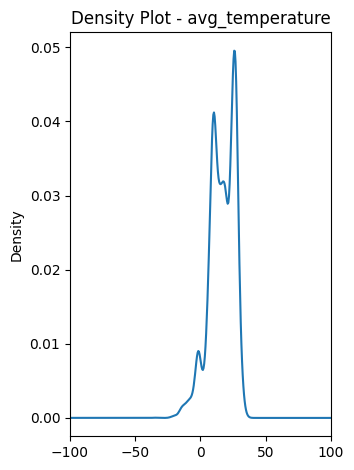

In [39]:
density_plot("avg_temperature")

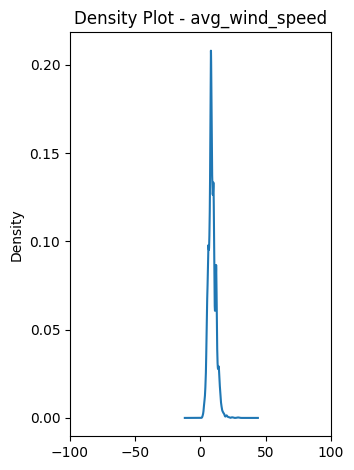

In [41]:
density_plot("avg_wind_speed")

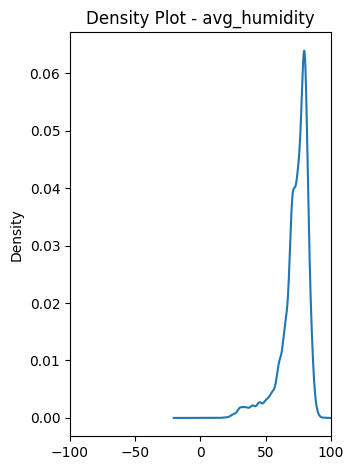

In [42]:
density_plot("avg_humidity")

# anamaly analysis

### temperature

In [50]:
Q1 = df['avg_temperature'].quantile(0.25)
Q3 = df['avg_temperature'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = df[(df['avg_temperature'] < (Q1 - 1.5 * IQR)) | (df['avg_temperature'] > (Q3 + 1.5 * IQR))]


In [51]:
outliers

,airport_name,city,country,iso_country,iata,altitude,latitude,longitude,original_city,avg_temperature,avg_wind_speed,avg_humidity,avg_visibility,z_score
9,thuleairbase,thule,Greenland,gl,thu,76.5048,76.531197,-68.703201,Thule,-16.0,16.0,72.0,12.0,-3.232555
25,kugaaruk,pellybay,Canada,ca,ybb,17.0688,68.534401,-89.808098,Pelly Bay,-15.0,9.0,78.0,20.0,-3.132696
31,cambridgebay,cambridgebay,Canada,ca,ycb,27.4320,69.108101,-105.138001,Cambridge Bay,-15.0,11.0,77.0,16.0,-3.132696
39,clyderiver,clyderiver,Canada,ca,ycy,26.5176,70.486099,-68.516701,Clyde River,-14.0,14.0,78.0,16.0,-3.032837
40,coralharbour,coralharbour,Canada,ca,yzs,64.0080,64.193298,-83.359398,Coral Harbour,-14.0,10.0,74.0,19.0,-3.032837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,nyurba,nyurba,Russia,ru,nyr,120.0912,63.294998,118.336998,Nyurba,-14.0,9.0,78.0,10.0,-3.032837
7496,sakkyryr,batagay-alyta,Russia,ru,suk,513.8928,67.792000,130.394000,Batagay-Alyta,-14.0,3.0,78.0,20.0,-3.032837
7497,ust-kuyga,ust-kuyga,Russia,ru,ukg,96.0120,70.011002,135.645004,Ust-Kuyga,-15.0,4.0,80.0,20.0,-3.132696
7498,verkhnevilyuisk,verkhnevilyuysk,Russia,ru,vhv,125.2728,63.458057,120.269165,Verkhnevilyuysk,-18.0,9.0,70.0,19.0,-3.432272


In [52]:
extreme_outliers = df[(df['avg_temperature'] < (Q1 - 3 * IQR)) | (df['avg_temperature'] > (Q3 + 3 * IQR))]


In [58]:
extreme_outliers
# must be a mistake 

,airport_name,city,country,iso_country,iata,altitude,latitude,longitude,original_city,avg_temperature,avg_wind_speed,avg_humidity,avg_visibility,z_score
4447,frankwileyfield,milescity,United States,us,mls,801.624,46.428001,-105.886002,Miles City,-214.0,12.0,69.0,16.0,-23.004577


In [65]:
# so I am going to manually google and replace this value
# according to Google it has a temperature of 46 F which is 7.77778 C
df.iloc[4447, 9] = 7.78

In [66]:
df[df["airport_name"] == "frankwileyfield"]

,airport_name,city,country,iso_country,iata,altitude,latitude,longitude,original_city,avg_temperature,avg_wind_speed,avg_humidity,avg_visibility,z_score
4447,frankwileyfield,milescity,United States,us,mls,801.624,46.428001,-105.886002,Miles City,7.78,12.0,69.0,16.0,-23.004577


### wind

In [67]:
df["avg_wind_speed"].max()

30.0

In [69]:
df[df["avg_wind_speed"]== 30.0]
# this is sensible as it is a skiing resort in the mountains

,airport_name,city,country,iso_country,iata,altitude,latitude,longitude,original_city,avg_temperature,avg_wind_speed,avg_humidity,avg_visibility,z_score
4906,mounthotham,mounthotham,Australia,au,mhu,1298.448,-37.047501,147.334,Mount Hotham,8.0,30.0,74.0,20.0,-0.835946


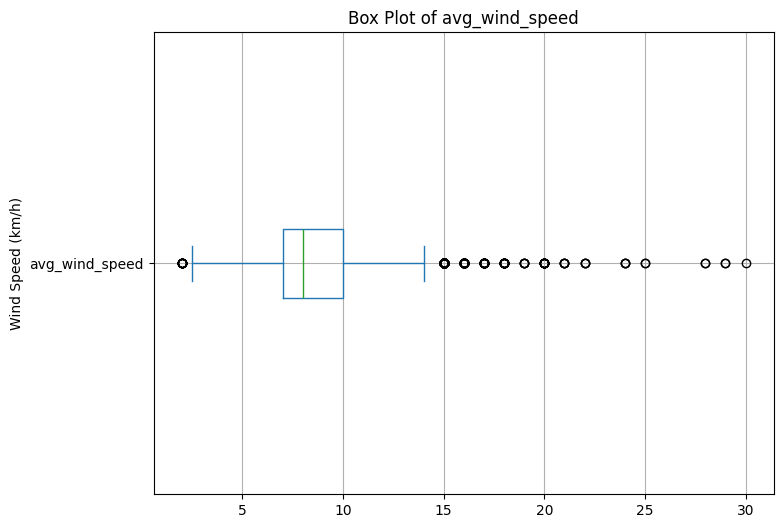

In [73]:
box_plot(df, "avg_wind_speed")

### humidity

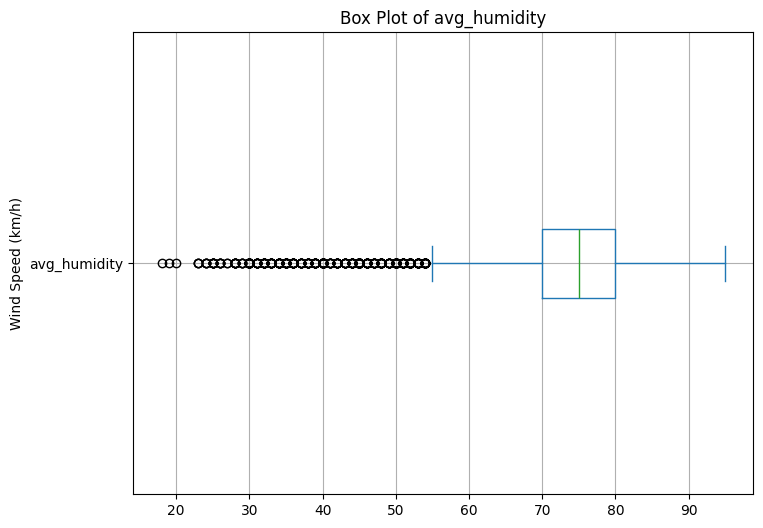

In [77]:
box_plot(df, "avg_humidity")

In [78]:
# looks fine for humidity

### visibility

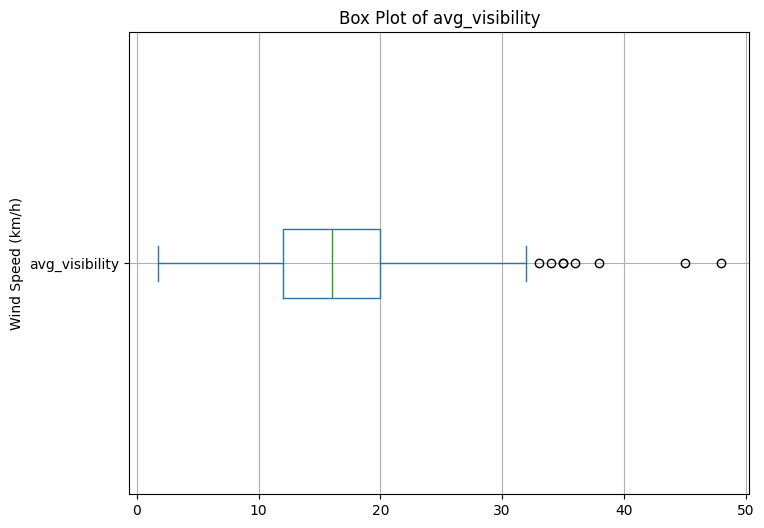

In [80]:
box_plot(df, "avg_visibility")

In [81]:
# everything looks fine here, no anomaly spotted

In [82]:
df.to_csv("airport_dataset_with_llm_weather_corrected.csv", index=False)